In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Problem 1
np.loadtxt('drop_data.csv', delimiter=',',skiprows=1)
#1. skiprow avoids the labels for the data. Without it you'll receive a value error unable to convert string 'time' into float64
data = np.loadtxt('drop_data.csv', delimiter=',',skiprows=1)

In [5]:
#2
v = 40 #m/s
g = 9.81 #m/s^2

def v_ideal(t):
    return g * t
def v_drag(t):
    return v * (1 - np.exp((-g*t)/v))


t_data = data[:, 0]  
v_data = data[:, 1] 

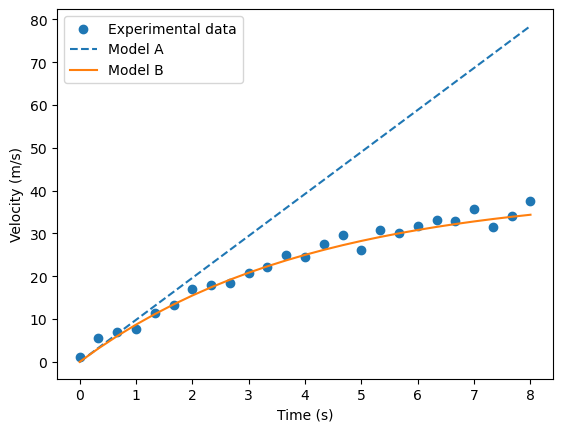

In [6]:
plt.scatter(t_data, v_data, label= "Experimental data")
plt.plot(t_data, v_ideal(t_data), linestyle='--', label= "Model A")
plt.plot(t_data, v_drag(t_data), label= "Model B")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
#3 The Ideal model continues a linear slope while the drag and experimental graphs both show an exponential line. The Ideal model ceases accuracy at approximately 2 seconds.

In [7]:
#Problem 2
#def v_guess(t):
    #return v * (1 - np.exp((-g*t)/v))
def plot_model_comparison(t_data, v_data, v_guess):
    return v_guess * (1 - np.exp((-g*t_data)/v_guess))
v_guess_1= 40 #m/s
v_guess_2= 42 #m/s
v_guess_3= 44 #m/s

<Figure size 300x200 with 0 Axes>

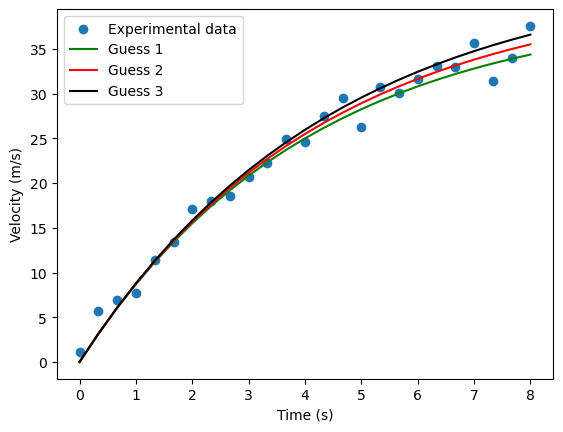

<Figure size 300x200 with 0 Axes>

In [8]:
plt.scatter(t_data, v_data, label= "Experimental data")
plt.plot(t_data, plot_model_comparison(t_data, v_data, v_guess_1), color= "green", label= "Guess 1")
plt.plot(t_data, plot_model_comparison(t_data, v_data, v_guess_2), color= "red", label= "Guess 2")
plt.plot(t_data, plot_model_comparison(t_data, v_data, v_guess_3), color= "black", label= "Guess 3")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.figure(figsize= (3,2))

#4 Guess 2 best represents the physical object used in the experiment. The other terminal velocities are accelerating at a lower or higher rate, which does not align with the experimental data.
#5 I believe 42 m/s best fits the experimental data. The slope of guess 2 passes through many of the exp. data points.

In [39]:
#Problem 3
np.loadtxt('spring_data.csv', delimiter=',',skiprows=1)
spring = np.loadtxt('spring_data.csv', delimiter=',',skiprows=1)

g= 9.8 #m/s^2

def spring_model (m,k):
    return (g/k)*m

m = spring[:,0]
k = spring[:,1]
k_guess = [10,25,40]


Text(0, 0.5, 'Displacement')

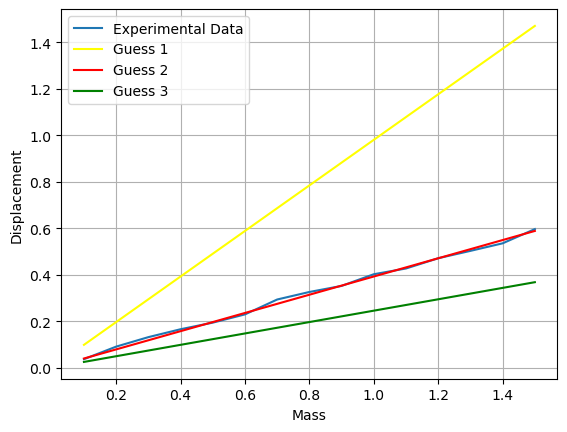

In [40]:
plt.plot(m, k, label= "Experimental Data")
plt.plot(m, spring_model(m, k_guess[0]),  color= "yellow", label= "Guess 1")
plt.plot(m, spring_model(m, k_guess[1]), color= "red", label= "Guess 2")
plt.plot(m, spring_model(m, k_guess[2]), color= "green", label= "Guess 3")

plt.legend()
plt.grid(True)
plt.xlabel("Mass")
plt.ylabel("Displacement")


In [48]:
#2.a The k value 25 N/m best fits the trend.
x_exp = spring_model(m,k)
x_mod = 25

residuals = x_exp - x_mod
print(f'Residuals for K=25: {residuals:}')


Residuals for K=25: [ 1.99628338 -3.29477937 -2.57651497 -1.25999925  0.31920175  0.67633277
 -1.59173712 -0.90822379  0.08990175 -0.60971808  0.27615777 -0.01191174
  0.36473663  0.65628687 -0.32973722]


In [49]:
x2_mod = 10
residuals2 = x_exp - x2_mo
x3_mod = 40


mse= np.mean(residuals**2)
print(f'MSE for k=25: {mse: .3f}')

MSE for k=25:  1.874


In [52]:
x2_mod = 10
residual2 = x_exp - x2_mod
x3_mod = 40
residuals3 = x_exp - x3_mod

mse= np.mean(residuals2**2)
print(f'MSE for k=10: {mse: .3f}')

mse= np.mean(residuals3**2)
print(f'MSE for k=40: {mse: .3f}')

MSE for k=10:  214.467
MSE for k=40:  239.282


In [ ]:
#4 When k is increased, the slope of the line gets flatter. As you move k away from the best value, the MSE grows.